[Data Set](https://data.gov.in/catalog/livestock-census-mizoram) : Livestock Census In Mizoram

In [1]:
from google.colab import files

uploaded = files.upload()



Saving data.csv to data.csv


In [3]:
import pandas as pd

In [6]:
import io 
df= pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [7]:
df

,State,DISTRICT,BUFFALO,PIG,POULTRY - Backyard,POULTRY - Commercial,CATTLE,MITHUN,GOAT
0,Uttar Pradesh,Hardoi,220,27842,8579,NaN,2354,452.0,425.0
1,Uttar Pradesh,Kannauj,55,89754,74589,NaN,1452,65.0,555.0
2,Uttar Pradesh,Unnao,24,2354,65248,NaN,635,NaN,245.0
3,Uttar Pradesh,Kanpur,13,14524,214563,NaN,745,NaN,2145.0
4,Uttar Pradesh,Meerut,555,96548,245613,NaN,4754,36.0,2365.0
5,Uttar Pradesh,Lucknow,4,25463,654785,12457.0,8975,NaN,454.0
6,Uttar Pradesh,Champhai,435,14526,678459,NaN,6985,3254.0,285.0
7,Uttar Pradesh,Bilgram,164,23541,124563,1452.0,3254,333.0,501.0
8,Uttar Pradesh,Savwajpur,1,23468,324574,NaN,7458,NaN,NaN
9,Uttar Pradesh,Sandila,112,45786,325478,NaN,6547,2.0,2458.0


In [8]:
df = df.fillna(0)

In [9]:
df

,State,DISTRICT,BUFFALO,PIG,POULTRY - Backyard,POULTRY - Commercial,CATTLE,MITHUN,GOAT
0,Uttar Pradesh,Hardoi,220,27842,8579,0.0,2354,452.0,425.0
1,Uttar Pradesh,Kannauj,55,89754,74589,0.0,1452,65.0,555.0
2,Uttar Pradesh,Unnao,24,2354,65248,0.0,635,0.0,245.0
3,Uttar Pradesh,Kanpur,13,14524,214563,0.0,745,0.0,2145.0
4,Uttar Pradesh,Meerut,555,96548,245613,0.0,4754,36.0,2365.0
5,Uttar Pradesh,Lucknow,4,25463,654785,12457.0,8975,0.0,454.0
6,Uttar Pradesh,Champhai,435,14526,678459,0.0,6985,3254.0,285.0
7,Uttar Pradesh,Bilgram,164,23541,124563,1452.0,3254,333.0,501.0
8,Uttar Pradesh,Savwajpur,1,23468,324574,0.0,7458,0.0,0.0
9,Uttar Pradesh,Sandila,112,45786,325478,0.0,6547,2.0,2458.0


In [10]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


BUFFALO                    340.000000
PIG                      75295.166667
POULTRY - Backyard      463654.333333
POULTRY - Commercial      1159.083333
CATTLE                    3895.083333
MITHUN                    2184.500000
GOAT                      1883.000000
dtype: float64

In [11]:
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


BUFFALO                    138.0
PIG                      26652.5
POULTRY - Backyard      230088.0
POULTRY - Commercial         0.0
CATTLE                    2804.0
MITHUN                      50.5
GOAT                       528.0
dtype: float64

In [12]:
#Mode
from collections import Counter

for col in df:
  print(col, end="\t")
  c = Counter(df[col])
  print(c.most_common(1)[0][0])

State	Uttar Pradesh
DISTRICT	Hardoi
BUFFALO	220
PIG	27842
POULTRY - Backyard	8579
POULTRY - Commercial	0.0
CATTLE	2354
MITHUN	0.0
GOAT	425.0


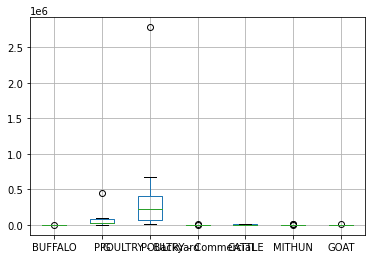

In [13]:
df.boxplot(column=['BUFFALO', 'PIG', 'POULTRY - Backyard', 'POULTRY - Commercial', 'CATTLE', 'MITHUN', 'GOAT'])

In [14]:
import numpy as np

cols = ['BUFFALO', 'PIG', 'POULTRY - Backyard', 'POULTRY - Commercial', 'CATTLE', 'MITHUN', 'GOAT']
for col in cols:
  print("Column ", col)
  data = df[col]
  Q1 = np.percentile(data, 25, interpolation = 'midpoint')
  Q3 = np.percentile(data, 75, interpolation = 'midpoint')
  IQR = Q3 - Q1
  print('Q1 Q3 IQR')
  print(Q1,Q3,IQR)
  LQR = Q1-(1.5*IQR)
  UQR = Q3+(1.5*IQR)
  print("Outliers are:")
  for i in data:
    if i < LQR or i > UQR:
      print(i)  

Column  BUFFALO
Q1 Q3 IQR
18.5 446.0 427.5
Outliers are:
2040
Column  PIG
Q1 Q3 IQR
18997.0 88859.5 69862.5
Outliers are:
451771
Column  POULTRY - Backyard
Q1 Q3 IQR
70032.0 490131.5 420099.5
Outliers are:
2781926
Column  POULTRY - Commercial
Q1 Q3 IQR
0.0 0.0 0.0
Outliers are:
12457.0
1452.0
Column  CATTLE
Q1 Q3 IQR
1497.0 6766.0 5269.0
Outliers are:
Column  MITHUN
Q1 Q3 IQR
0.0 1853.0 1853.0
Outliers are:
8965.0
13107.0
Column  GOAT
Q1 Q3 IQR
355.0 2255.0 1900.0
Outliers are:
11298.0
